### Libraries to be used

In [1]:
import pandas as pd
import glob, os
import matplotlib.pyplot as plt
from transformers import pipeline
from __future__ import unicode_literals
import spacy,en_core_web_sm
from spacy.lang.en import English
from spacy.matcher import Matcher
import textacy
import string
from wordcloud import WordCloud, STOPWORDS 
import numpy as np
import nltk
import locationtagger
from difflib import SequenceMatcher
import gensim
from gensim.models import Word2Vec
from gensim import models
import seaborn as sns
import tensorflow as tf
import transformers
from sentence_transformers import SentenceTransformer
import torch
from sentence_transformers import SentenceTransformer, util

C:\Users\Asus\anaconda3\envs\aaaa\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Using resuts from homework 1

In [2]:
class MlSkillsOne:
    
    def __init__(self):
        pass
        self.all_records_raw_df = self.read_data_of_individual_topics()
        self.target_phrase = "Jeu de Paume is an excellent art gallery in Paris"        
        self.data_cleaner()
        self.get_score()
        self.corpus = self.all_records_raw_df['name_cleaned'].map(lambda row: [row]).tolist()

    def read_data_of_individual_topics(self):
        
        all_records_df = pd.read_csv("data_full_task_one.csv")[:100]
       
        return all_records_df
    
    
    def data_cleaner(self):

        self.all_records_raw_df["name_cleaned"] = self.all_records_raw_df.name\
            .apply(lambda row: row.translate(str.maketrans('', '', string.punctuation)))
        
        self.all_records_raw_df["target_phrase"] = self.target_phrase
        
    def word_cloud(self, score):
        string = self.all_records_raw_df[self.all_records_raw_df.score == score].name_cleaned
        comment_words = ''
        stopwords = set(STOPWORDS)
        for val in string:

            # typecaste each val to string
            val = str(val)

            # split the value
            tokens = val.split()

            # Converts each token into lowercase
            for i in range(len(tokens)):
                tokens[i] = tokens[i].lower()

            comment_words += " ".join(tokens)+" "

        wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

        # plot the WordCloud image                      
        plt.figure(figsize = (8, 8), facecolor = None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad = 0)

        plt.show()   
        
    def get_score(self):
        
        sentiment_pipeline = pipeline("sentiment-analysis",
                              model="nlptown/bert-base-multilingual-uncased-sentiment")
        
        self.all_records_raw_df["labels"] = self.all_records_raw_df.name_cleaned.\
                                            apply(lambda x: sentiment_pipeline(x))
        self.all_records_raw_df["score"] = self.all_records_raw_df.labels.\
                                            apply(lambda x: list(x[0].items())[0][1])
        self.all_records_raw_df.drop(["labels"], axis=1, inplace=True)
        
        self.all_records_raw_df.score.replace('5 stars', 5, inplace = True)
        
        self.all_records_raw_df.score.replace('4 stars', 4, inplace = True)
        
        self.all_records_raw_df.score.replace('3 stars', 3, inplace = True)
        
        self.all_records_raw_df.score.replace('2 stars', 2, inplace = True)
        
        self.all_records_raw_df.score.replace('1 star', 1, inplace = True)
   
    
    
#     def figure1(self):       
#         self.all_records_raw_df[self.all_records_raw_df.score == 1].apply(self.word_cloud())
        
#     def figure2(self):       
#         word_cloud(self.all_records_raw_df[self.all_records_raw_df.score == 2])
        
#     def figure3(self):       
#         word_cloud(self.all_records_raw_df[self.all_records_raw_df.score == 3])

#     def figure4(self):       
#         word_cloud(self.all_records_raw_df[self.all_records_raw_df.score == 4])
        
#     def figure5(self):       
#         word_cloud(self.all_records_raw_df[self.all_records_raw_df.score == 5])
        

        

In [3]:
%%time
trantor = MlSkillsOne()

CPU times: total: 20 s
Wall time: 19.5 s


## Exercise 3
### Using the multi-lingual model
### 3.1) Make the sentiment score prediction for each of the topics.
### 3.2) Add the scores as a new field of the dataframe (df).

In [4]:
trantor.get_score()

In [5]:
trantor.all_records_raw_df

,Unnamed: 0,id,name,audience_size,country,topic,name_cleaned,target_phrase,score
0,0,6003103801917,Royal Doulton,258710,NaN,NaN,Royal Doulton,Jeu de Paume is an excellent art gallery in Paris,5
1,1,6003554853263,Tower Heist,356610,NaN,NaN,Tower Heist,Jeu de Paume is an excellent art gallery in Paris,1
2,2,6003006086492,Bathstore,32090,NaN,NaN,Bathstore,Jeu de Paume is an excellent art gallery in Paris,4
3,3,6003332326741,Family Guy Fans,37120,NaN,NaN,Family Guy Fans,Jeu de Paume is an excellent art gallery in Paris,4
4,4,6003104481229,Joseph Gordon-Levitt,5866260,NaN,NaN,Joseph GordonLevitt,Jeu de Paume is an excellent art gallery in Paris,4
...,...,...,...,...,...,...,...,...,...
95,95,6002925841521,Tomb Raider (serie),1747730,NaN,NaN,Tomb Raider serie,Jeu de Paume is an excellent art gallery in Paris,5
96,96,6003649939313,Sandvik,278090,NaN,NaN,Sandvik,Jeu de Paume is an excellent art gallery in Paris,3
97,97,6003719975462,Rock de Estados Unidos,163000550,NaN,NaN,Rock de Estados Unidos,Jeu de Paume is an excellent art gallery in Paris,5
98,98,6003333789551,Thirteen (film),0,NaN,NaN,Thirteen film,Jeu de Paume is an excellent art gallery in Paris,5


In [6]:
def tagged_document(list_of_list_of_words):
    for i, list_of_words in enumerate(list_of_list_of_words):
        yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])

In [7]:
%%time
data_for_training = list(tagged_document(trantor.corpus))
model = gensim.models.doc2vec.Doc2Vec(vector_size=1, min_count=1, epochs=30)
model.build_vocab(data_for_training)
model.train(data_for_training, total_examples=model.corpus_count, epochs=model.epochs)

CPU times: total: 250 ms
Wall time: 270 ms


In [8]:
trantor.all_records_raw_df["name_cleaned"].apply(lambda x: model.infer_vector([x])).apply(lambda x:x[0])

0     0.362033
1    -0.488752
2     0.405350
3    -0.054439
4     0.270603
        ...   
95   -0.295054
96   -0.091884
97   -0.251776
98   -0.350972
99    0.385810
Name: name_cleaned, Length: 100, dtype: float32

In [9]:
trantor.all_records_raw_df["infer_vector"] = trantor.all_records_raw_df["name_cleaned"].\
                                                apply(lambda x: model.infer_vector([x])).apply(lambda x:x[0])
trantor.all_records_raw_df

,Unnamed: 0,id,name,audience_size,country,topic,name_cleaned,target_phrase,score,infer_vector
0,0,6003103801917,Royal Doulton,258710,NaN,NaN,Royal Doulton,Jeu de Paume is an excellent art gallery in Paris,5,0.384150
1,1,6003554853263,Tower Heist,356610,NaN,NaN,Tower Heist,Jeu de Paume is an excellent art gallery in Paris,1,-0.477240
2,2,6003006086492,Bathstore,32090,NaN,NaN,Bathstore,Jeu de Paume is an excellent art gallery in Paris,4,0.397065
3,3,6003332326741,Family Guy Fans,37120,NaN,NaN,Family Guy Fans,Jeu de Paume is an excellent art gallery in Paris,4,-0.058417
4,4,6003104481229,Joseph Gordon-Levitt,5866260,NaN,NaN,Joseph GordonLevitt,Jeu de Paume is an excellent art gallery in Paris,4,0.263482
...,...,...,...,...,...,...,...,...,...,...
95,95,6002925841521,Tomb Raider (serie),1747730,NaN,NaN,Tomb Raider serie,Jeu de Paume is an excellent art gallery in Paris,5,-0.291247
96,96,6003649939313,Sandvik,278090,NaN,NaN,Sandvik,Jeu de Paume is an excellent art gallery in Paris,3,-0.094022
97,97,6003719975462,Rock de Estados Unidos,163000550,NaN,NaN,Rock de Estados Unidos,Jeu de Paume is an excellent art gallery in Paris,5,-0.248038
98,98,6003333789551,Thirteen (film),0,NaN,NaN,Thirteen film,Jeu de Paume is an excellent art gallery in Paris,5,-0.344300


### 3.3) Visualize the distribution of the scores corresponding to the topics assigned to each of the five classes (one distribution plot for each label).

<AxesSubplot:xlabel='infer_vector', ylabel='Count'>

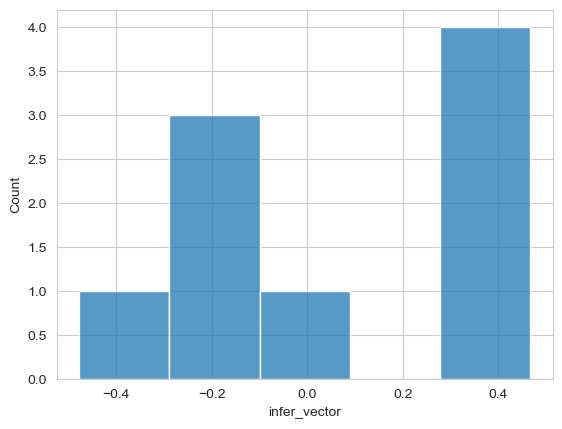

In [10]:
sns.set_style('whitegrid')
sns.histplot(data=trantor.all_records_raw_df.infer_vector[trantor.all_records_raw_df['score']  == 1])

<AxesSubplot:xlabel='infer_vector', ylabel='Count'>

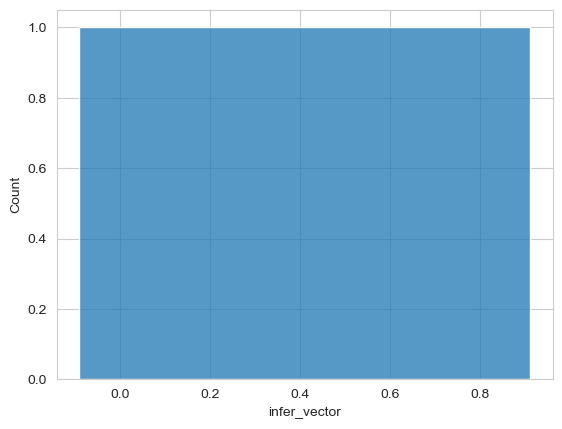

In [11]:
sns.set_style('whitegrid')
sns.histplot(data=trantor.all_records_raw_df.infer_vector[trantor.all_records_raw_df['score']  == 2])

<AxesSubplot:xlabel='infer_vector', ylabel='Count'>

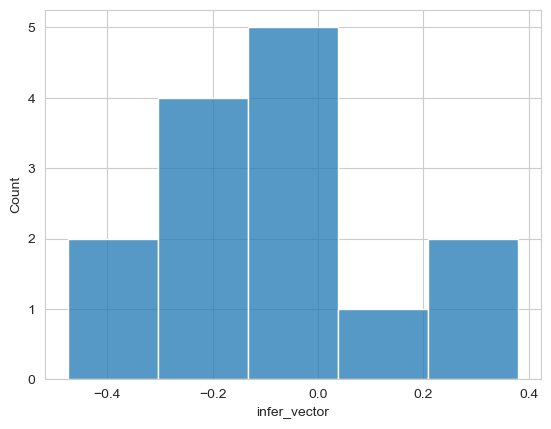

In [12]:
sns.set_style('whitegrid')
sns.histplot(data=trantor.all_records_raw_df.infer_vector[trantor.all_records_raw_df['score']  == 3])

<AxesSubplot:xlabel='infer_vector', ylabel='Count'>

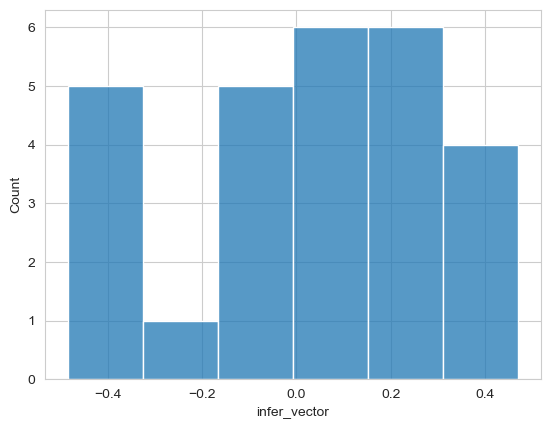

In [13]:
sns.set_style('whitegrid')
sns.histplot(data=trantor.all_records_raw_df.infer_vector[trantor.all_records_raw_df['score']  == 4])

<AxesSubplot:xlabel='infer_vector', ylabel='Count'>

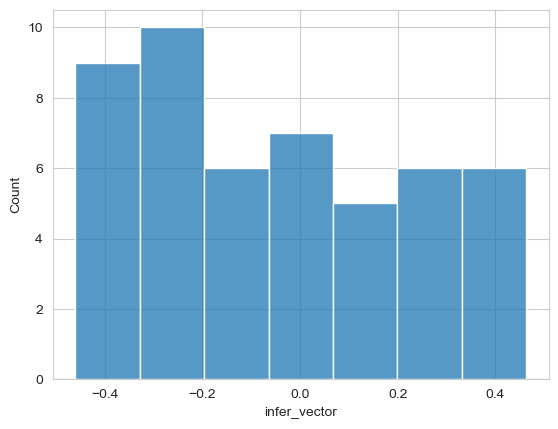

In [14]:
sns.set_style('whitegrid')
sns.histplot(data=trantor.all_records_raw_df.infer_vector[trantor.all_records_raw_df['score']  == 5])

### 3.4) Visualize the five wordclouds respectively corresponding to the set of topics that have been assigned by the model to the each class.

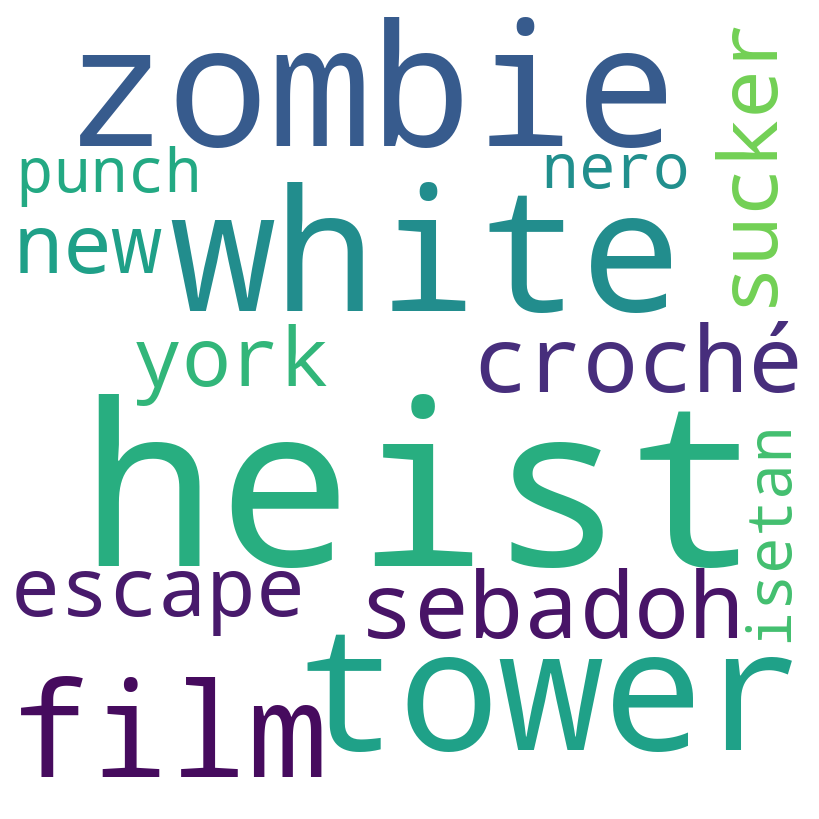

In [15]:
trantor.word_cloud(1)

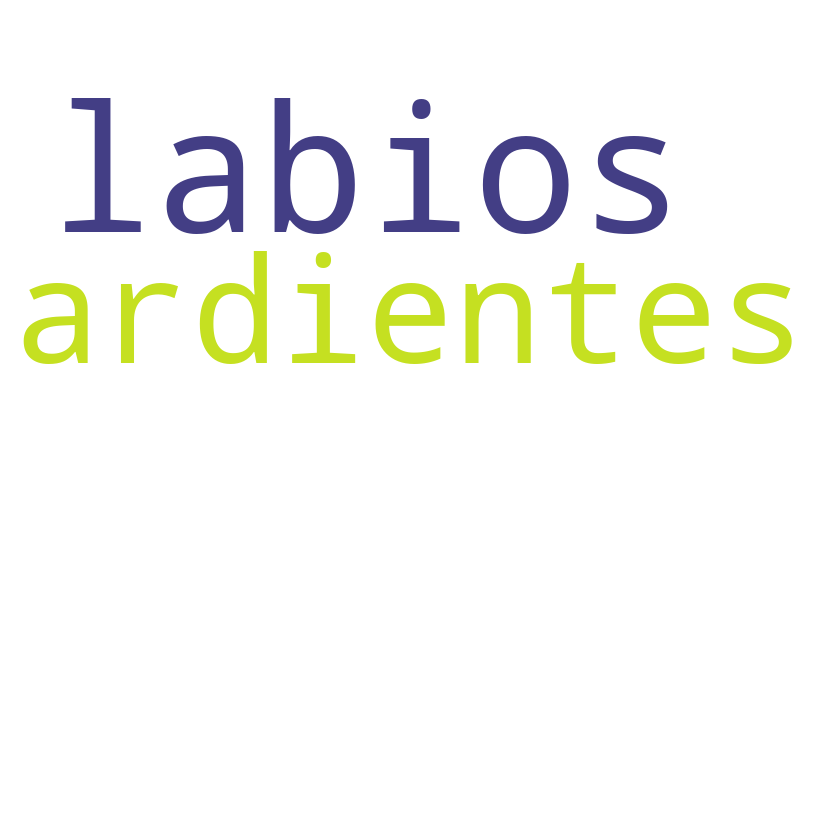

In [16]:
trantor.word_cloud(2)

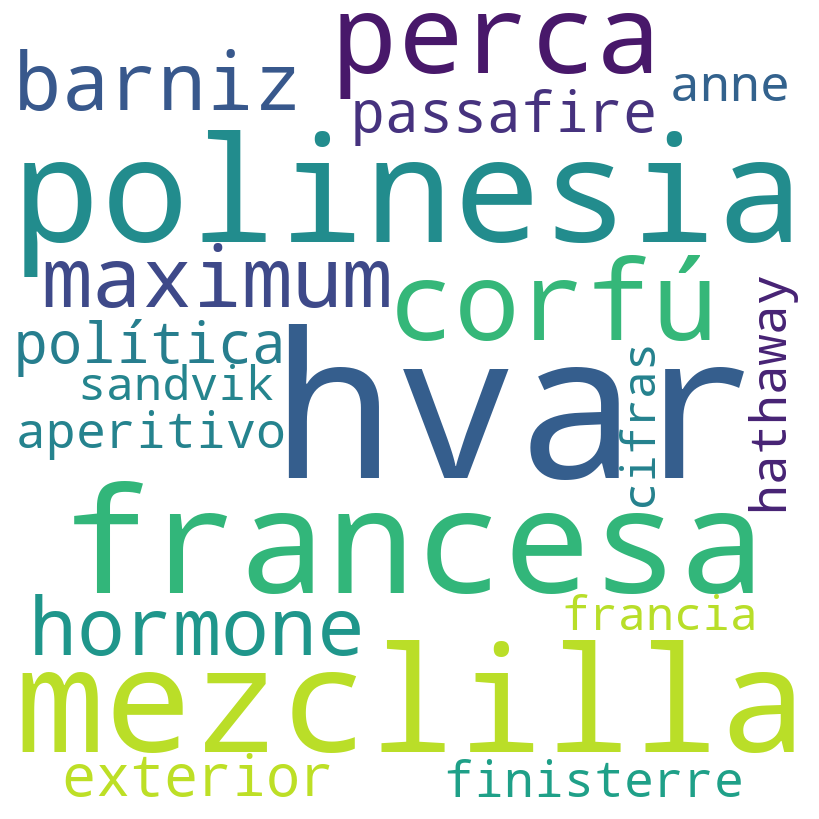

In [17]:
trantor.word_cloud(3)

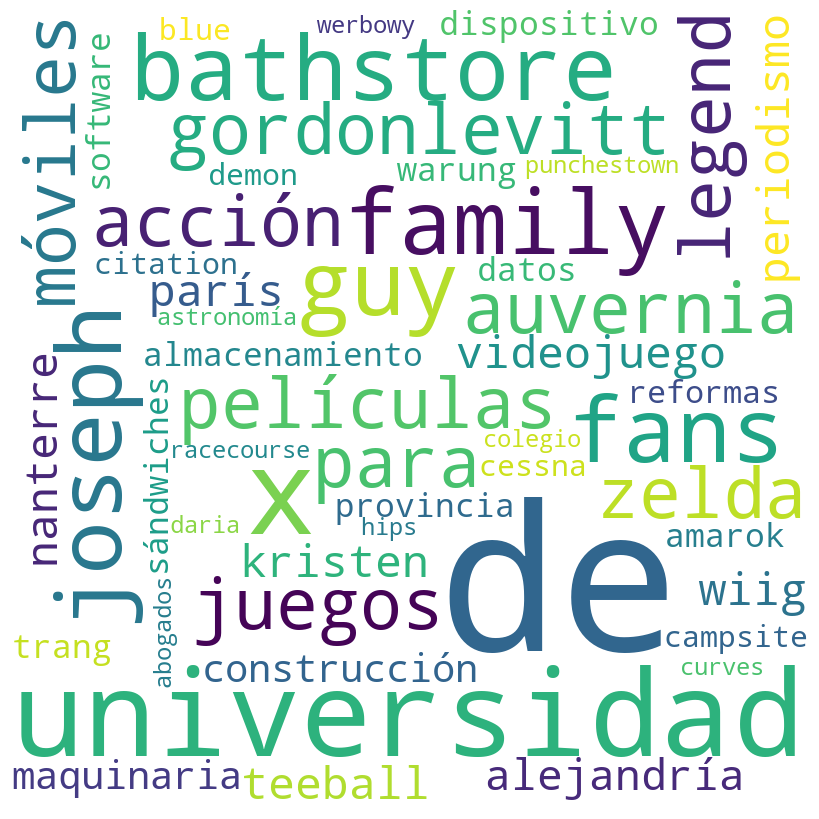

In [18]:
trantor.word_cloud(4)

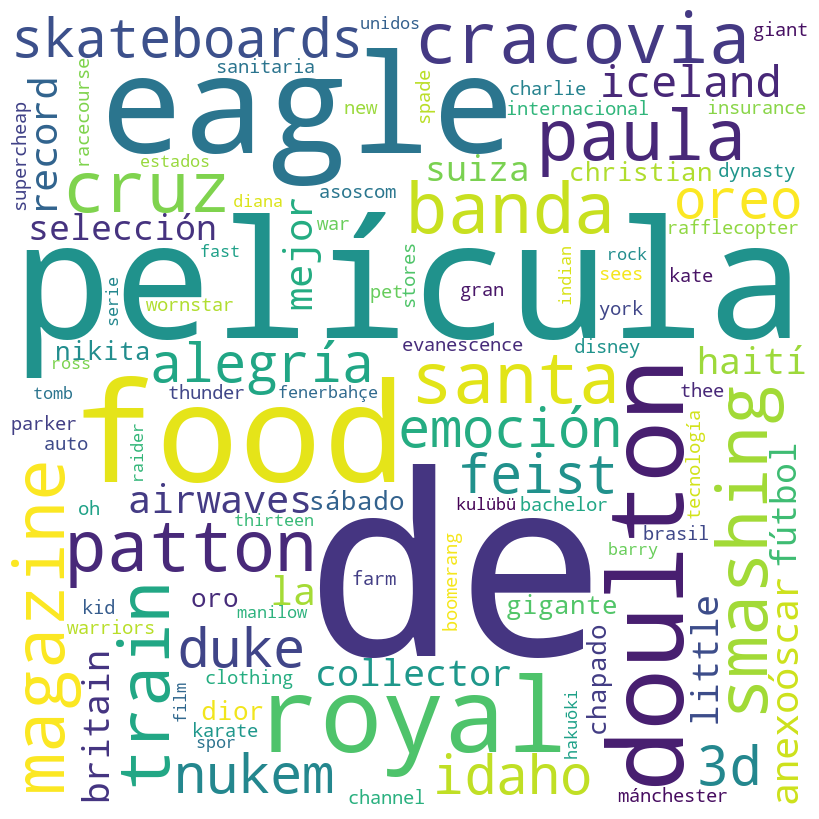

In [19]:
trantor.word_cloud(5)

### 3.5) Start from the values of semantic similarities between the target sentence "Jeu de Paume is an excellent art gallery in Paris" and each sentence in the_topics. Retrain the model "bert-base-multilingual-uncased-sentiment" or any other model from the library transformers in such a way that the model learns to predict the semantic similarity of an arbitrary sentence to the given target sentence. You should first split the_topics into sets [train, validation, test] in order to evaluate the performance of the model for the regression task.

In [21]:
df_corpus = trantor.all_records_raw_df[["name_cleaned", "target_phrase"]].rename(columns = \
                                    {"name_cleaned": "sentence1", "target_phrase": "sentence2"})
df_corpus

,sentence1,sentence2
0,Royal Doulton,Jeu de Paume is an excellent art gallery in Paris
1,Tower Heist,Jeu de Paume is an excellent art gallery in Paris
2,Bathstore,Jeu de Paume is an excellent art gallery in Paris
3,Family Guy Fans,Jeu de Paume is an excellent art gallery in Paris
4,Joseph GordonLevitt,Jeu de Paume is an excellent art gallery in Paris
...,...,...
95,Tomb Raider serie,Jeu de Paume is an excellent art gallery in Paris
96,Sandvik,Jeu de Paume is an excellent art gallery in Paris
97,Rock de Estados Unidos,Jeu de Paume is an excellent art gallery in Paris
98,Thirteen film,Jeu de Paume is an excellent art gallery in Paris


In [22]:
model = SentenceTransformer('bert-base-nli-mean-tokens')